# Worksheet 18

Name:  Carlos Contreras
UID: U63425893

### Topics

- Linear Regression

### Optional Challenge

Every day my alarm goes off at seemingly random times… I’ve recorded the times at which it goes off for the past year of so (1 - 355 days). Today is day 356. Can you predict when my alarm will ring using `data.csv`?

Please fill out the piazza poll if you think you found the answer.

## Linear Regression

Where does randomness come from?

Randomness are variables we cannot capture the nature of, so we just assume they are noise either cause it would be hard to model or is unimportant to what we are trying to analyze


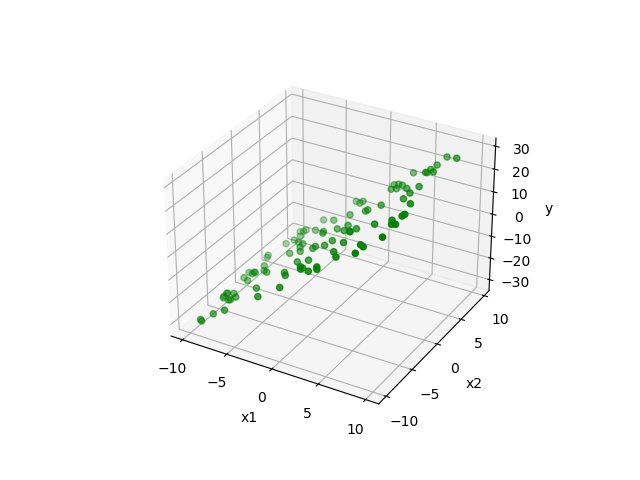

In [21]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


SAMPLE_SIZE = 100

# it's possible for y = 3 * x_1 + (1/4) * x_2
# but we don't know to look for x_2 and we only have x_1 as a feature
x1 = -10.0 + 20.0 * np.random.random(SAMPLE_SIZE)
x2 = -10.0 + 20.0 * np.random.random(SAMPLE_SIZE)
y = 3 * x1 + (1/4) * x2

# Create the figure
fig = plt.figure()

# Add an axes
ax = fig.add_subplot(111,projection='3d')

# and plot the point 
ax.scatter(x1 , x2 , y,  color='green')
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
plt.show()

a) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 0.5 * X + eps`.

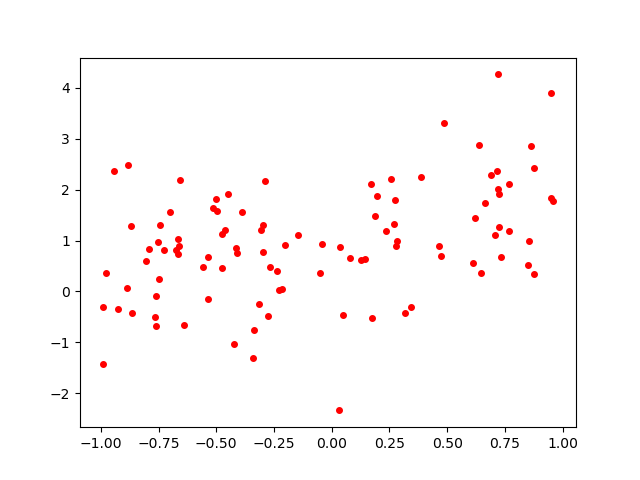

In [23]:
import numpy as np
import matplotlib.pyplot as plt

plt.ioff()

SAMPLE_SIZE = 100

true_beta = np.array([ 1 , 0.5 ])
x = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
y = true_beta[0] + true_beta[1] * x + np.random.randn(SAMPLE_SIZE)

plt.clf()
plt.plot(x,y,'ro',markersize=4)
plt.show()

b) Plot the least squares estimate line through the scatter plot.

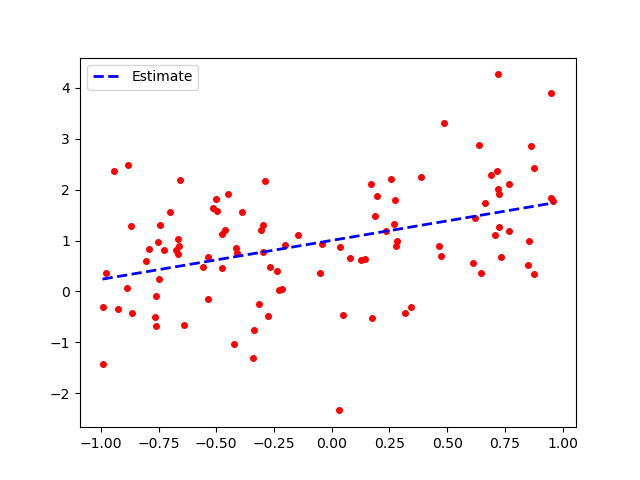

In [24]:
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y



x_plot = np.linspace(min(x), max(x), 50)
y_est = beta_hat[0] + beta_hat[1] * x_plot


plt.plot(x, y,'ro',markersize=4)
plt.plot(x_plot, y_est,'b--', lw=2, label='Estimate')
plt.legend()
plt.show()

c) How does the estimate of `beta` compare to the parameters we used to generate the data?

Comparing the estimated bata to the true beta we get 

Estimated beta: [0.92951453 0.32743827]
True beta: [1.  0.5]

This shows that the estimated Beta is close but slighlty under the true beta we used to generate the data. 

d) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 3 * X + .5 * X^2 + eps`.

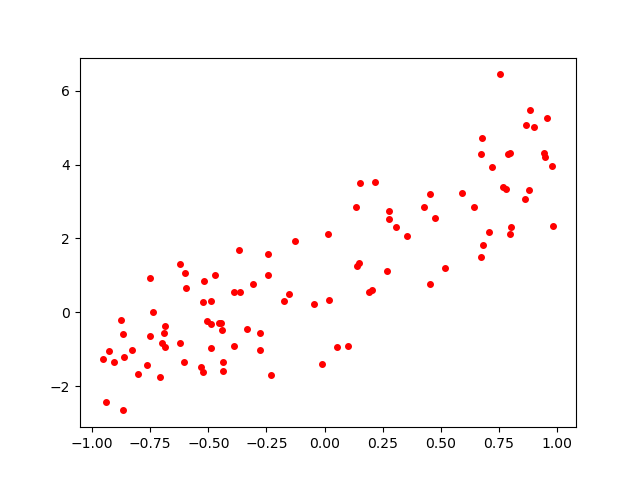

In [46]:
SAMPLE_SIZE = 100

true_beta = np.array([ 1 , 3, 0.5 ])
x = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
y = true_beta[0] + true_beta[1] * x + true_beta[2] * x**2 + np.random.randn(SAMPLE_SIZE)
plt.plot(x,y,'ro',markersize=4)
plt.show()

e) Plot the least squares estimate line through the scatter plot.

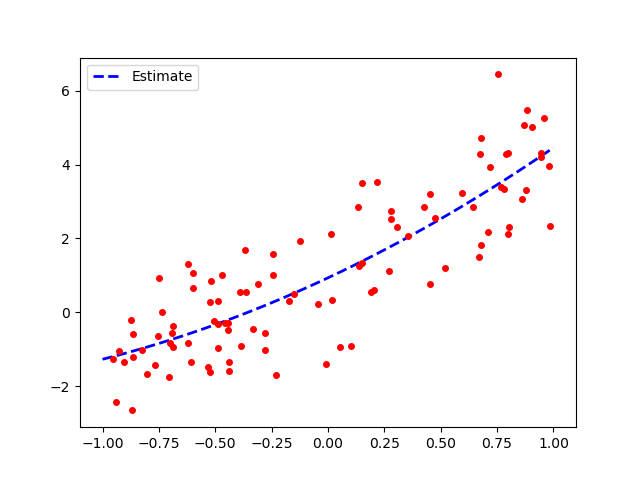

True beta:  [1.  3.  0.5]
Estimated beta:  [0.93288194 2.86702827 0.65983171]


In [47]:
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x, x**2]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y



x_plot = np.linspace(-1,1,50)
y_est = beta_hat[0] + beta_hat[1] * x_plot + beta_hat[2] * x_plot**2
plt.plot(x_plot, y_est,'b--', lw=2, label='Estimate')
plt.plot(x, y,'ro',markersize=4)
plt.legend()
plt.show()

print("True beta: ", true_beta)
print("Estimated beta: ", beta_hat)

f) How does the estimate of `beta` compare to the parameters we used to generate the data?

it has a much better fit than in the first graph but the quality of the estimates varies significantly from run to run. sometimes it is very close, other times there is a deviation of around 0.5 +- in the second estimate. 

g) Let's repeat d) and f) a large number of times to see how close our estimates are on average and what that distribution looks like.

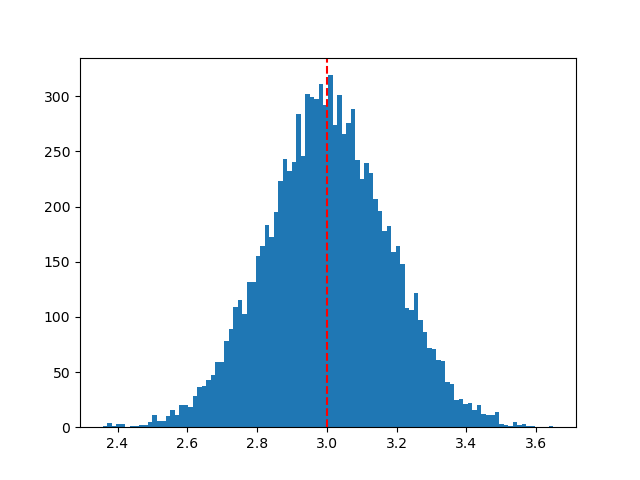

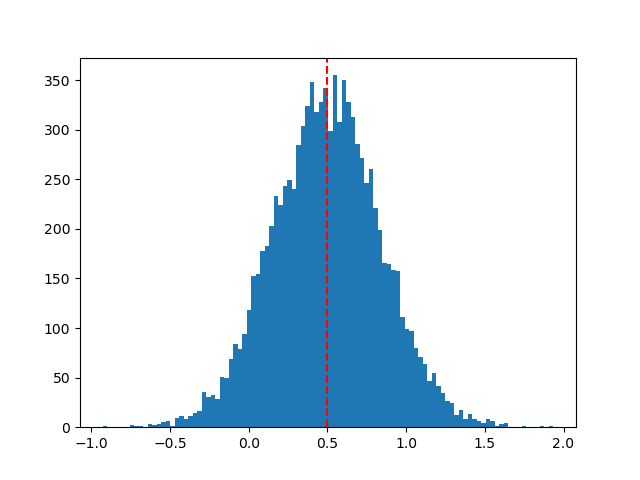

In [48]:
import numpy as np
import matplotlib.pyplot as plt

betas = []
true_beta = np.array([ 1 , 3, 0.5])
for _ in range(10000):
    x = -1 + 2 * np.random.random(SAMPLE_SIZE)
    y = true_beta[0] + true_beta[1] * x + true_beta[2] * x**2 + np.random.randn(SAMPLE_SIZE)
    intercept = np.ones(np.shape(x)[0])
    X = np.array([intercept, x, x**2]).T
    betas.append(np.linalg.inv(X.T @ X) @ X.T @ y) #

plt.hist(np.array(betas)[:, 1], bins=100)
plt.axvline(x=true_beta[1], c='r', linestyle='dashed')
plt.show()

plt.hist(np.array(betas)[:, 2], bins=100)
plt.axvline(x=true_beta[2], c='r', linestyle='dashed')
plt.show()


